# **Scratch**

- In this notebook, we will code to build a decion tree from scratch
- Let's go

# **Data**

In [1]:
# get data from drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier

## Constant

In [3]:
RANDOM_STATE = 42
SPLIT_RATE = 0.2

## Load Dataset



This dataset is obtained from Kaggle: [Heart Failure Prediction Dataset](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction)

In [4]:
# load the dataset using pandas
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/heart.csv")
cat_variables = ['Sex',
'ChestPainType',
'RestingECG',
'ExerciseAngina',
'ST_Slope',
]
target_variable = ['HeartDisease']
df = df.loc[:, target_variable + cat_variables]
df

,HeartDisease,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,0,M,ATA,Normal,N,Up
1,1,F,NAP,Normal,N,Flat
2,0,M,ATA,ST,N,Up
3,1,F,ASY,Normal,Y,Flat
4,0,M,NAP,Normal,N,Up
...,...,...,...,...,...,...
913,1,M,TA,Normal,N,Flat
914,1,M,ASY,Normal,N,Flat
915,1,M,ASY,Normal,Y,Flat
916,1,F,ATA,LVH,N,Flat


- View data

In [5]:
type(df)

pandas.core.frame.DataFrame

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   HeartDisease    918 non-null    int64 
 1   Sex             918 non-null    object
 2   ChestPainType   918 non-null    object
 3   RestingECG      918 non-null    object
 4   ExerciseAngina  918 non-null    object
 5   ST_Slope        918 non-null    object
dtypes: int64(1), object(5)
memory usage: 43.2+ KB


In [7]:
df.isna().sum()

HeartDisease      0
Sex               0
ChestPainType     0
RestingECG        0
ExerciseAngina    0
ST_Slope          0
dtype: int64

In [8]:
df.shape

(918, 6)

## OneHot Encoding

In [9]:
# This will replace the columns with the one-hot encoded ones and keep the columns outside 'columns' argument as it is.
df = pd.get_dummies(data = df,
                         prefix = cat_variables,
                         columns = cat_variables)
df

,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1
1,1,1,0,0,0,1,0,0,1,0,1,0,0,1,0
2,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1
3,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0
4,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,1,0,1,0,0,0,1,0,1,0,1,0,0,1,0
914,1,0,1,1,0,0,0,0,1,0,1,0,0,1,0
915,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0
916,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0


In [10]:
df.shape

(918, 15)

## Split Dataset

In [11]:
inputs = df.iloc[:, 1:]
outputs = df.iloc[:, 0]

In [12]:
inputs

,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,0,1,0,1,0,0,0,1,0,1,0,0,0,1
1,1,0,0,0,1,0,0,1,0,1,0,0,1,0
2,0,1,0,1,0,0,0,0,1,1,0,0,0,1
3,1,0,1,0,0,0,0,1,0,0,1,0,1,0
4,0,1,0,0,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,0,1,0,0,0,1,0,1,0,1,0,0,1,0
914,0,1,1,0,0,0,0,1,0,1,0,0,1,0
915,0,1,1,0,0,0,0,1,0,0,1,0,1,0
916,1,0,0,1,0,0,1,0,0,1,0,0,1,0


In [13]:
outputs
type(outputs)

pandas.core.series.Series

In [14]:
four = train_test_split(inputs, outputs, test_size = SPLIT_RATE, random_state = RANDOM_STATE)
X_fit, X_val, y_fit, y_val = [x.to_numpy() for x in four]

In [15]:
X_fit

array([[0, 1, 0, ..., 1, 0, 0],
       [0, 1, 0, ..., 0, 0, 1],
       [0, 1, 1, ..., 0, 1, 0],
       ...,
       [0, 1, 1, ..., 0, 0, 1],
       [0, 1, 1, ..., 0, 0, 1],
       [1, 0, 1, ..., 0, 1, 0]], dtype=uint8)

In [16]:
X_val

array([[1, 0, 0, ..., 0, 0, 1],
       [0, 1, 0, ..., 0, 1, 0],
       [0, 1, 1, ..., 0, 1, 0],
       ...,
       [0, 1, 1, ..., 0, 1, 0],
       [0, 1, 0, ..., 0, 0, 1],
       [0, 1, 1, ..., 0, 1, 0]], dtype=uint8)

In [17]:
y_fit.shape

(734,)

In [18]:
sum(y_fit == 0)/len(y_fit)

0.4536784741144414

- balance --> good

# **Decision Tree Algorithm**

## Entropy of a set  

In [19]:
def compute_entropy(y):

    entropy = 0

    if len(y) == 0:
        return 0
    entropy = sum(y[y==1])/len(y)
    if entropy == 0 or entropy == 1:
        return 0
    else:
        return -entropy*np.log2(entropy) - (1-entropy)*np.log2(1-entropy)

In [20]:
compute_entropy(np.array([1, 0, 1]))

0.9182958340544896

## Split dataset at node

In [21]:
def split_dataset(X, node_indices, feature):

    left_indices = []
    right_indices = []

    for i in node_indices:
        if X[i][feature] == 1:
            left_indices.append(i)
        else:
            right_indices.append(i)

    return left_indices, right_indices

In [22]:
len(split_dataset(X_fit, list(range(len(X_fit))), 0)[0])

166

In [23]:
len(split_dataset(X_fit, list(range(len(X_fit))), 0)[1])

568

In [24]:
len(X_fit)

734

## Information Gain at node

In [25]:
def compute_information_gain(X, y, node_indices, feature):

    left_indices, right_indices = split_dataset(X, node_indices, feature)
    # print(left_indices)
    # print(right_indices)
    X_node, y_node = X[node_indices], y[node_indices]
    X_left, y_left = X[left_indices], y[left_indices]
    X_right, y_right = X[right_indices], y[right_indices]

    information_gain = 0

    node_entropy = compute_entropy(y_node)
    left_entropy = compute_entropy(y_left)
    right_entropy = compute_entropy(y_right)
    w_left = len(X_left) / len(X_node)
    w_right = len(X_right) / len(X_node)
    weighted_entropy = w_left * left_entropy + w_right * right_entropy
    information_gain = node_entropy - weighted_entropy

    return information_gain

In [26]:
compute_information_gain(X_fit, y_fit, list(range(len(X_fit))), 0)

0.07480460470514483

In [27]:
compute_information_gain(X_fit, y_fit, list(range(len(X_fit))), 13)

0.3083065284840649

## Get Best Split at node

In [28]:
def get_best_split(X, y, node_indices):
    num_features = X.shape[1]

    best_feature = -1

    max_info_gain = 0
    for feature in range(num_features):
        info_gain = compute_information_gain(X, y, node_indices, feature)
        if info_gain > max_info_gain:
            max_info_gain = info_gain
            best_feature = feature


    return best_feature

In [29]:
get_best_split(X_fit, y_fit, list(range(len(X_fit))))

13

## Recursive

In [30]:
class Node:
  def __init__(self):
    self.feature_split = -1
    self.label_result = -1
    self.left = np.nan # Node*
    self.right = np.nan # Node*


In [31]:
def build_tree_recursive(X, y, node_indices, branch_name, max_depth, min_samples_split, current_depth, tree, node: Node):

    if current_depth == max_depth or len(node_indices) < min_samples_split:
        formatting = " "*current_depth + "-"*current_depth
        print(formatting, "%s leaf node with indices" % branch_name, node_indices)
        if sum(y[node_indices]) / len(y[node_indices]) >= 0.5: # label result
            node.label_result = 1
        else:
            node.label_result = 0
        print("label is: ", node.label_result)
        return


    best_feature = get_best_split(X, y, node_indices)
    node.feature_split = best_feature # build tree

    formatting = "-"*current_depth
    print("%s Depth %d, %s: Split on feature: %d" % (formatting, current_depth, branch_name, best_feature))


    left_indices, right_indices = split_dataset(X, node_indices, best_feature)
    tree.append((left_indices, right_indices, best_feature))

    node.left = Node() # new Node() # create branch
    node.right = Node()
    build_tree_recursive(X, y, left_indices, "Left", max_depth, min_samples_split, current_depth+1, tree, node.left)
    build_tree_recursive(X, y, right_indices, "Right", max_depth, min_samples_split, current_depth+1, tree, node.right)
    return tree

In [32]:
tree = []
root = Node()

In [33]:
tree = build_tree_recursive(X_fit, y_fit, list(range(len(X_fit))), "Root", max_depth=3, min_samples_split=2, current_depth=0, tree = tree, node = root)

 Depth 0, Root: Split on feature: 13
- Depth 1, Left: Split on feature: 2
-- Depth 2, Left: Split on feature: 9
   --- Left leaf node with indices [22, 35, 43, 49, 53, 92, 99, 108, 116, 127, 131, 137, 142, 143, 160, 162, 205, 221, 223, 224, 241, 251, 256, 263, 265, 270, 320, 321, 322, 367, 368, 372, 385, 386, 395, 401, 405, 414, 416, 418, 467, 470, 476, 483, 495, 519, 521, 528, 557, 561, 574, 588, 589, 595, 600, 611, 628, 647, 664, 678, 693, 694, 698, 701, 702, 707, 712, 729, 730]
label is:  0
   --- Right leaf node with indices [6, 62, 74, 75, 86, 96, 100, 128, 150, 151, 155, 257, 292, 343, 347, 426, 432, 451, 455, 458, 474, 494, 512, 524, 538, 622, 632, 637, 657, 679, 687, 692, 699, 718, 731, 732]
label is:  1
-- Depth 2, Right: Split on feature: 0
   --- Left leaf node with indices [3, 9, 13, 39, 41, 88, 91, 103, 104, 109, 114, 115, 124, 132, 166, 168, 169, 177, 195, 197, 201, 207, 216, 225, 235, 236, 240, 246, 248, 259, 266, 280, 281, 297, 304, 307, 327, 328, 330, 337, 350, 351, 35

In [34]:
root.feature_split

13

In [35]:
root.label_result

-1

- make predictions

In [36]:
def predict(node: Node, x: np.array) -> int:
    if(node.feature_split == -1):
      return node.label_result
    if(x[node.feature_split] == 1):
      return predict(node.left, x)
    elif(x[node.feature_split] == 0):
      return predict(node.right, x)

In [37]:
predict(root, X_fit[0])

1

In [38]:
for turn in range(10):
  i = np.random.randint(len(X_fit))
  print(i, predict(root, X_fit[i]) == y_fit[i])

23 True
607 True
510 True
461 True
458 True
373 True
629 True
107 True
258 True
205 True


## **Decision Tree PackPage**

In [39]:
class DecisionTree:
  def __init__(self, max_depth: int = 3, min_samples_split: int = 2):
    self.max_depth = max_depth
    self.min_samples_split = min_samples_split
    self.root = Node()
  def learning(self, X_fit: np.array, y_fit: np.array) -> None:
    tree = build_tree_recursive(X_fit, y_fit, list(range(len(X_fit))), "Root",
                                max_depth=self.max_depth, min_samples_split=self.min_samples_split,
                                current_depth=0, tree = [],
                                node = self.root)
  def makePredictions(self, X_test: np.array) -> np.array:
    predictions = []
    for i in range(len(X_test)):
      predictions += [predict(self.root, X_test[i])]
    return np.array(predictions)


In [40]:
dtree = DecisionTree()
dtree.learning(X_fit, y_fit)

 Depth 0, Root: Split on feature: 13
- Depth 1, Left: Split on feature: 2
-- Depth 2, Left: Split on feature: 9
   --- Left leaf node with indices [22, 35, 43, 49, 53, 92, 99, 108, 116, 127, 131, 137, 142, 143, 160, 162, 205, 221, 223, 224, 241, 251, 256, 263, 265, 270, 320, 321, 322, 367, 368, 372, 385, 386, 395, 401, 405, 414, 416, 418, 467, 470, 476, 483, 495, 519, 521, 528, 557, 561, 574, 588, 589, 595, 600, 611, 628, 647, 664, 678, 693, 694, 698, 701, 702, 707, 712, 729, 730]
label is:  0
   --- Right leaf node with indices [6, 62, 74, 75, 86, 96, 100, 128, 150, 151, 155, 257, 292, 343, 347, 426, 432, 451, 455, 458, 474, 494, 512, 524, 538, 622, 632, 637, 657, 679, 687, 692, 699, 718, 731, 732]
label is:  1
-- Depth 2, Right: Split on feature: 0
   --- Left leaf node with indices [3, 9, 13, 39, 41, 88, 91, 103, 104, 109, 114, 115, 124, 132, 166, 168, 169, 177, 195, 197, 201, 207, 216, 225, 235, 236, 240, 246, 248, 259, 266, 280, 281, 297, 304, 307, 327, 328, 330, 337, 350, 351, 35

In [41]:
predictions = dtree.makePredictions(X_val)

In [42]:
help(accuracy_score)

Help on function accuracy_score in module sklearn.metrics._classification:

accuracy_score(y_true, y_pred, *, normalize=True, sample_weight=None)
    Accuracy classification score.
    
    In multilabel classification, this function computes subset accuracy:
    the set of labels predicted for a sample must *exactly* match the
    corresponding set of labels in y_true.
    
    Read more in the :ref:`User Guide <accuracy_score>`.
    
    Parameters
    ----------
    y_true : 1d array-like, or label indicator array / sparse matrix
        Ground truth (correct) labels.
    
    y_pred : 1d array-like, or label indicator array / sparse matrix
        Predicted labels, as returned by a classifier.
    
    normalize : bool, default=True
        If ``False``, return the number of correctly classified samples.
        Otherwise, return the fraction of correctly classified samples.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Sample weights.
    
    Ret

In [43]:
accuracy_score(y_val, predictions)

0.8315217391304348

# **Compare With Sklearn**

## Sklearn

In [44]:
# create a estimator
sk_version = DecisionTreeClassifier(criterion='entropy', max_depth = 4, min_samples_split = 50, random_state = 42)

In [45]:
# learning
sk_version.fit(X_fit, y_fit)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=50,
                       random_state=42)

In [46]:
# score validation
sk_version.score(X_fit, y_fit)

0.8569482288828338

In [47]:
sk_version.score(X_val, y_val)

0.8315217391304348

In [48]:
sk_version.predict(X_val)

array([0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1])

In [49]:
# create a report about score metrics
print(classification_report(y_val, sk_version.predict(X_val)))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81        77
           1       0.89      0.81      0.85       107

    accuracy                           0.83       184
   macro avg       0.83      0.84      0.83       184
weighted avg       0.84      0.83      0.83       184



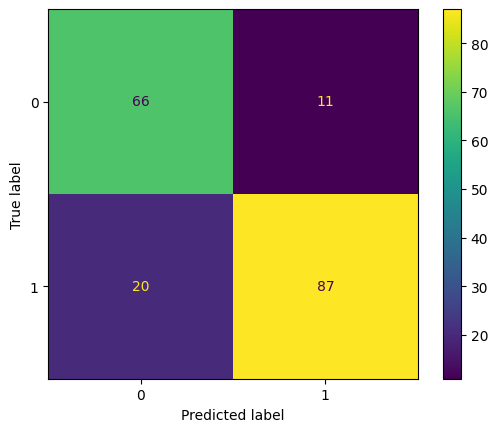

In [50]:
# draw confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cfs_mtx = confusion_matrix(y_val, sk_version.predict(X_val))
disp = ConfusionMatrixDisplay(cfs_mtx)
disp.plot()

### Grid Search Cross

In [51]:
# parameters for GridSearch with Cross
from sklearn.model_selection import GridSearchCV
param_grid = {
  'criterion': ['entropy'],
  'max_depth': list(range(1, 10)),
  'min_samples_split': list(range(2, 100, 5))
}
# search fitting
GSCross = GridSearchCV(estimator=sk_version, param_grid=param_grid, cv=3)
GSCross.fit(X_fit, y_fit)

GridSearchCV(cv=3,
             estimator=DecisionTreeClassifier(criterion='entropy', max_depth=4,
                                              min_samples_split=50,
                                              random_state=42),
             param_grid={'criterion': ['entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_split': [2, 7, 12, 17, 22, 27, 32, 37, 42,
                                               47, 52, 57, 62, 67, 72, 77, 82,
                                               87, 92, 97]})

In [52]:
GSCross.best_params_

{'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 2}

In [53]:
GSCross.best_score_

0.8569142411062786

In [54]:
best_est = GSCross.best_estimator_
best_est.score(X_val, y_val)

0.8315217391304348

## Scratch

In [55]:
scratch = DecisionTree(max_depth = 4, min_samples_split= 50)
scratch.learning(X_fit, y_fit)

 Depth 0, Root: Split on feature: 13
- Depth 1, Left: Split on feature: 2
-- Depth 2, Left: Split on feature: 9
--- Depth 3, Left: Split on feature: 8
    ---- Left leaf node with indices [127, 205, 256, 321, 372, 405, 416, 483, 557, 628, 694, 702, 729]
label is:  0
    ---- Right leaf node with indices [22, 35, 43, 49, 53, 92, 99, 108, 116, 131, 137, 142, 143, 160, 162, 221, 223, 224, 241, 251, 263, 265, 270, 320, 322, 367, 368, 385, 386, 395, 401, 414, 418, 467, 470, 476, 495, 519, 521, 528, 561, 574, 588, 589, 595, 600, 611, 647, 664, 678, 693, 698, 701, 707, 712, 730]
label is:  0
   --- Right leaf node with indices [6, 62, 74, 75, 86, 96, 100, 128, 150, 151, 155, 257, 292, 343, 347, 426, 432, 451, 455, 458, 474, 494, 512, 524, 538, 622, 632, 637, 657, 679, 687, 692, 699, 718, 731, 732]
label is:  1
-- Depth 2, Right: Split on feature: 0
--- Depth 3, Left: Split on feature: 6
    ---- Left leaf node with indices [104, 169, 177, 235, 330, 337, 422, 503, 542, 546, 563, 581, 584, 683,

In [56]:
accuracy_score(y_val, scratch.makePredictions(X_val))

0.8315217391304348

In [57]:
accuracy_score(y_fit, scratch.makePredictions(X_fit))

0.8569482288828338

In [58]:
scratch = DecisionTree(max_depth = 3, min_samples_split= 2)
scratch.learning(X_fit, y_fit)

 Depth 0, Root: Split on feature: 13
- Depth 1, Left: Split on feature: 2
-- Depth 2, Left: Split on feature: 9
   --- Left leaf node with indices [22, 35, 43, 49, 53, 92, 99, 108, 116, 127, 131, 137, 142, 143, 160, 162, 205, 221, 223, 224, 241, 251, 256, 263, 265, 270, 320, 321, 322, 367, 368, 372, 385, 386, 395, 401, 405, 414, 416, 418, 467, 470, 476, 483, 495, 519, 521, 528, 557, 561, 574, 588, 589, 595, 600, 611, 628, 647, 664, 678, 693, 694, 698, 701, 702, 707, 712, 729, 730]
label is:  0
   --- Right leaf node with indices [6, 62, 74, 75, 86, 96, 100, 128, 150, 151, 155, 257, 292, 343, 347, 426, 432, 451, 455, 458, 474, 494, 512, 524, 538, 622, 632, 637, 657, 679, 687, 692, 699, 718, 731, 732]
label is:  1
-- Depth 2, Right: Split on feature: 0
   --- Left leaf node with indices [3, 9, 13, 39, 41, 88, 91, 103, 104, 109, 114, 115, 124, 132, 166, 168, 169, 177, 195, 197, 201, 207, 216, 225, 235, 236, 240, 246, 248, 259, 266, 280, 281, 297, 304, 307, 327, 328, 330, 337, 350, 351, 35

In [59]:
print(accuracy_score(y_val, scratch.makePredictions(X_val)))
print(accuracy_score(y_fit, scratch.makePredictions(X_fit)))

0.8315217391304348
0.8569482288828338


## Conclude:
- The score of Scratch Version is equal with Sklearn Version